# COGS 118A- Project Checkpoint - Fetal Health Classification

# Names


- Belinda Yan
- Jennifer Wong
- Nick Schaefer
- Hiba Shaikh

# Abstract 


Our goal is to accurately train a classifier to be able to detect fetal health problems early on in order to decrease current rates of child mortality. To accomplish this, we will be using cardiotocogram data, which are measurements taken from the fetus during pregnancy and labour like Fetal Heart Rate (FHR) and number of uterine contractions per second, among many other fetal condition measurements. With this data, we will train K Nearest Neighbors (KNN) and decision tree classifiers in order to recognize when a fetus health is normal, suspect, or pathological. We then will assess and select the best model so that we will be able to provide an accurate and reliable tool meant to aid in identifying and treating fetal health problems as early as possible. In order to quantify what our best model is, we will split our data into train and tests sets where the model will train with our training data and then be evaluated with our testing data. We then will use zero-one loss to judge the model's performance, which is the average number of errors across the test performances of each model, and then pick the one with the smallest average error.



# Background



Fetal mortality is classified as the death of a fetus prior to delivery. Although it is a very prevalent issue, it is often overlooked as the public tends to focus more on infant mortality due to lack of sufficient knowledge about what causes fetal mortality and how to prevent it. Most of the data collected on fetal deaths are of the deaths that occur at 20 weeks of gestation or more and very little data is collected about deaths prior to that time. Even with the collected data, there is a lot of variation among the completeness of the data as well as the method of reporting it. According to the Center for Disease and Control (CDC), 20,854 fetal deaths that happened at 20 weeks of gestation or more were reported in the U.S. in 2020 and the fetal mortality rate for 2020 was 5.74 deaths per 1,000 live births<a name="Gregory"></a>[<sup>[1]</sup>](#Gregorynote). Although a significant proportion of fetal deaths cannot be connected to a singular cause, many studies have shown that some factors that may contribute to fetal deaths include lack of access to assistance in labor and delivery, maternal conditions or complications, infections, and birth injuries, among many others. One solution for these problems could be increasing access to emergency obstetric care and access to skilled labor and delivery so that fetal deaths can be kept at a minimum <a name="JR"></a>[<sup>[2]</sup>](#JRnote). Minimizing fetal health is important as it pertains to population health as a whole and can ultimately aid us in addressing and solving a variety of problems related to healthcare and access to such services beginning with infant and fetal care <a name="Washington State Department of Health"></a>[<sup>[3]</sup>](#Washingtonnote). 

# Problem Statement


Question: Can our model accurately predict fetus mortality 80% of the time?

Several of the United Nations' Sustainable Development Goals speak on decreasing the number of preventable deaths of newborns and children under 5 years of age. Currently, a vast majority of child and maternal mortality (94%) occur in low-resource settings in which most could have been prevented.

The use of Cardiotocograms (CTGs), a simple and cost accessible option, can help assess fetal health. In turn, healthcare professionals can take actions to prevent child and maternal mortality earlier.

Therefore the binary classification problem we are trying to solve is determining whether a fetus is healthy or not based on the different features in the dataset. Our goal is to use ML techniques and data from CTGs, in order to create models that accurately predict fetal health up to 80% of the time.




# Data


**Link to dataset:**
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

**Dataset size:** Our dataset has 22 variables and 2126 observations.

**Description of an observation:** An observation consists of health information for a fetal. The information includes the the following:
- baseline fetal heart rate
- number of heart rate accelerations per second
- number of fetal movements per second
- number of uterine contractions per second of mother
- number of light decelerations per second
- number of severe decelerations per second
- number of prolonged decelerations per second
- percentage of time with abnormal short term variability
- mean value of short term variability
- percentage of time with abnormal long term variability
- mean value of long term variability
- width of histogram made (using all values recorded)
- histogram minimum value (using all values recorded)
- histogram maximum value (using all values recorded)
- number of peaks in exam histogram (using all values recorded)
- number of zeroes (using all values recorded)
- histogram mode (using all values recorded)
- histogram mean (using all values recorded)
- histogram median (using all values recorded)
- histogram variance (using all values recorded)
- histogram trend (using all values recorded)
- fetal health (categorized as normal, suspect, or pathological)

*Note: Decelerations are temporary but distinct decreases of fetal heart rate.*

**Critical variables:** Some critical variables are listed below. These variables will be critical in our classifcation problem.
- baseline fetal heart rate
  - represented as integers
- number of heart rate accelerations per second
  - represented as floats
- number of fetal movements per second
  - represented as floats
- number of uterine contractions per second of mother
  - represented as floats
- number of light decelerations per second
  - represented as floats
- number of severe decelerations per second
  - represented as floats
- number of prolonged decelerations per second
  - represented as floats
- percentage of time with abnormal short term variability
  - represented as floats
- mean value of short term variability
  - represented as floats
- percentage of time with abnormal long term variability
  - represented as floats
- mean value of long term variability
  - represented as floats
- fetal health
  - represented as integers 1, 2, or 3 (1 - normal, 2 - suspect, 3 - pathological)

**Transformations & Cleaning:** 


Setup dataframe with data:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group025-SP23/main/fetal_health.csv')
df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


Remove columns that have histogram calculations: 

In [ ]:
df = df[df.columns.drop(list(df.filter(regex='histogram')))]
df = df.dropna()
df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,3.0


There are no columns that have null values so there is no data to remove from the dataset

In [ ]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

Split data into training and testing datasets:

In [ ]:
X = df.drop(columns=['fetal_health'])
Y = df['fetal_health']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# Proposed Solution



The solution to our problem of determining which features are most important in determining a fetus' health and classifying it as healthy or not is using different classification models and then determine which is the most accurate. We plan on training our model by using K Nearest Neighbors and then again with decision tree classifiers to classify between healthy and unhealthy fetuses. Decision trees and K Nearest Neighbors are both effective classifiers for our problem, and will allow us to train each of these models to accuaretly predict a fetus' health. Then we plan on using nested cross validation to determine the best model and the best parameters for that model. 






# Evaluation Metrics


We plan our evaluating our model using the following methods: 

* The accuracy of the model - test using zero-one loss
* Precision - proportion of correct postive instances
* Recall - true positive rate, as false negatives can be detrimental to fetal health and treatment plan
* F1 score - mean of precision and recall, gives a more balanced measure

We believe these metrics will help us evaluate our model in order to determine whether it will be accurate at predicting the fetus' health.


# Preliminary results

##Feature Selection using Random Forest

**Features available:**

*   `baseline value`: baseline fetal heart rate
*   `accelerations`: short term rises in fetal heart rate
*   `fetal_movement`: number of fetal movements in pregnant woman
*   `uterine_contractions`: contractions of pregnant women
*   `light_decelerations`: light decelerations of fetal heart rate
*   `severe_decelerations`: severe decelerations of fetal heart rate
*   `prolongued_decelerations`: prolongued decelerations of fetal heart rate
*   `abnormal_short_term_variability`: number of abnormal short term variability
*   `mean_value_of_short_term_variability`: mean number of abnormal short term variability
*   `percentage_of_time_with_abnormal_long_term_variability`: percentage of time fetal heart rate has abnormal long term variability
*   `mean_value_of_long_term_variability`: mean number of abnormal long term variability


Random forests are not influenced by outliers and does not need scaling or transformation of variables. Random forests are also known provide high accuracy and balance the bias-variance trade-off well. This feature selection works well with datasets without high-cardinality features due to it being impurity-based, which aligns well with our dataset. Since random forests have good performance and efficient runtime in training large datasets, we decided to use it to determine the features importances.


We fitted a Random Forest Classifier on our training data and determined the feature importances corresponding to each of our features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fits training data and gets feature importance
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_

Using the features importances, we generated a bar plot to visualize and compare each of the feature importance to another. Note the feature importances are generated using Mean Feature in Impurity (MDI).

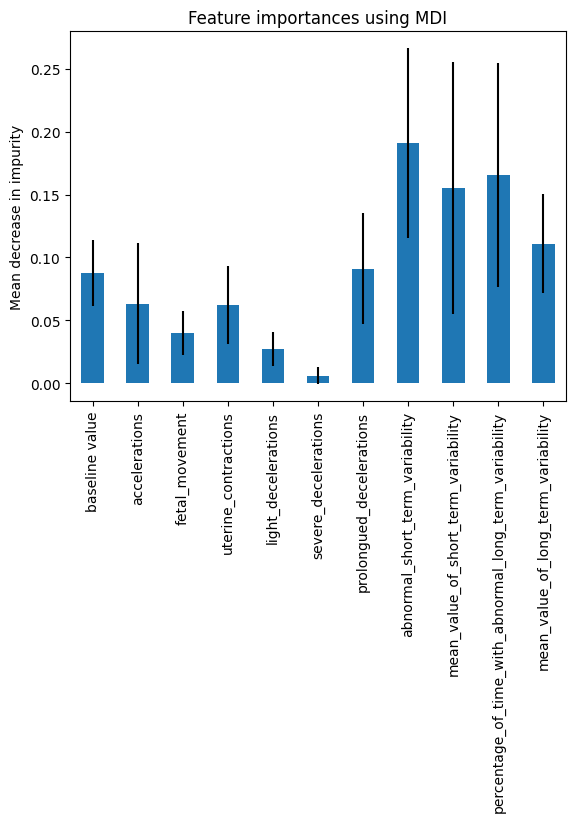

In [ ]:
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# plots features importances along with its standard deviation
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

The top 3 most importance features are `abnormal_short_term_variability`, `mean_value_of_short_term_variability`, and `percentage_of_time_with_abnormal_long_term_variability`.

## K-Nearest Neighbors

After doing feature selection, we used a K-Nearest Neighbors algorithm on our training data to generate preliminary results and test the accuracy of the algorithm on our testing data. We chose k = 20 for this training as it is just a preliminary test and the best value of k will be optimized and tested later.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating a dataset with only the top 3 most important features and their fetal health classifications
features = df[['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'fetal_health']]
X = features.drop(columns=['fetal_health'])
Y = features['fetal_health']
# Splitting the data into training and testing sets based off of the most important features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Features from the test and training sets are scaled with StandardScaler to ensure they are on the same scale before being passed in
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and fit the data on the K Nearest Neighbors Classifier object
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, Y_train)
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.8665413533834586


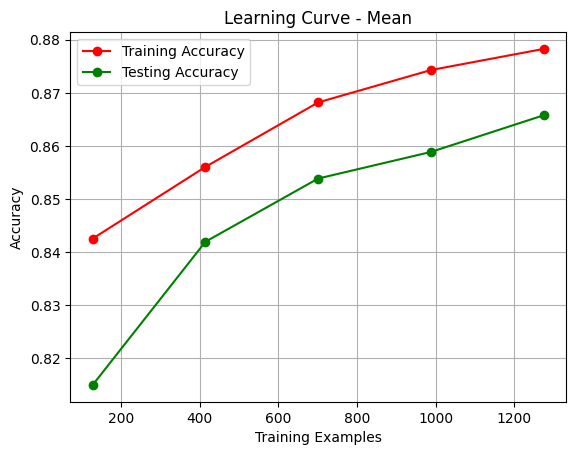

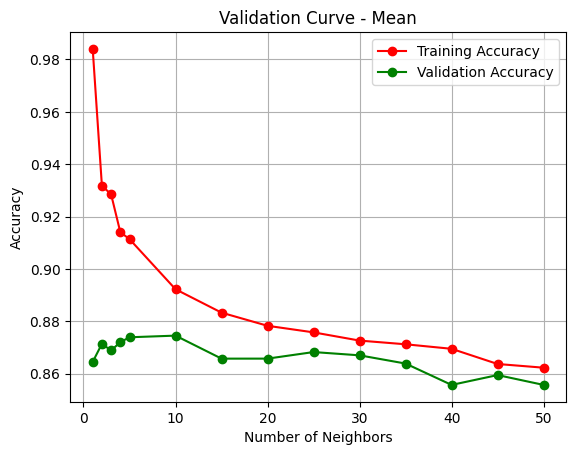

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, validation_curve

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_scaled, Y_train, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve - Mean")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Plot validation curve
param_range = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  
train_scores, val_scores = validation_curve(knn, X_train_scaled, Y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.title("Validation Curve - Mean")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Ethics & Privacy


Some ethics and privacy issues we must consider when working on this topic include:
- The data is collected with informed consent from the pregnant individuals as well as healthcare providers
- Confidentiality of the individuals must be maintained
- Bias and Fairness must be considered for the collection and use of data, especially related to demographic bias
- Benefit and Risk Assessment: we must consider the potential postive effect on fetal health, but also need to evaluate the risks of things like misclassification


# Team Expectations 

Our Team Expectations are: 

* Consider everyone's opinion equally when making decisions on the project
* Communicate clearly and frequently
* Let eachother know about any issues going on
* If you're struggling with your assigned portion, let us know you need help
* Address conflicts constructively and respectfully. If they persist, we can consult class staff as needed
* Distribute the workload equally and fairly among team members
* Be accountable and responsible for your assigned tasks.
* Set goals for the project and work to complete them on time

# Project Timeline Proposal

Replace this with something meaningful that is appropriate for your needs. It doesn't have to be something that fits this format.  It doesn't have to be set in stone... "no battle plan survives contact with the enemy". But you need a battle plan nonetheless, and you need to keep it updated so you understand what you are trying to accomplish, who's responsible for what, and what the expected due dates are for each item.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/15  |  4 PM |  Brainstorm topics/questions (all)  | Outline communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 5/22  |  4 PM |  Fine tune project details and goal  | Begin model selection process | 
| 5/29  | 4 PM  | Run nested cross-validation and find model   | Begin training model|
| 6/5  | 4 PM  | finish training model  | Begin testing model on evaluation metrics and how it generalizes   |
| 6/14  | Before 7:59 PM  | NA | Turn in Final Project  |


| Deadline  | Due date|
|---|---|
| Proposal  |  5/17 8 PM |  
| Peer review of proposals  |  5/24 8 PM |  
| Checkpoint  |  5/31 8 PM |  
| Final project  |  6/14 8 PM |  

# Footnotes
<a name="Gregory"></a>1.[^](#Gregorynote): Gregory, C.W. Elizabeth. (4 Aug 2022). Fetal Mortality: United States, 2020. *CDC*. https://www.cdc.gov/nchs/data/nvsr/nvsr71/nvsr71-04.pdf<br> 
<a name="JR"></a>2.[^](#JRnote): JR Bale. (2003). Improving Birth Outcomes: Meeting the Challenge in the Developing World. *National Library of Medicine*. https://www.ncbi.nlm.nih.gov/books/NBK222084/<br>

<a name="Washington State Department of Health"></a>3.[^](#Washingtonnote): Washington State Department of Health. Fetal and Infant Death Data. *Washington State Department of Health*. https://doh.wa.gov/data-and-statistical-reports/washington-tracking-network-wtn/fetal-and-infant-death-data <br>